<a href="https://colab.research.google.com/github/paulorfbr/tensor_flow_course_deep_learning/blob/main/TF2_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
!wget https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv

--2023-10-06 08:52:10--  https://raw.githubusercontent.com/lazyprogrammer/machine_learning_examples/master/tf2.0/moore.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2302 (2.2K) [text/plain]
Saving to: ‘moore.csv’

moore.csv           100%[===================>]   2.25K  --.-KB/s    in 0s      

2023-10-06 08:52:10 (40.5 MB/s) - ‘moore.csv’ saved [2302/2302]



In [ ]:
#load data
data = pd.read_csv('moore.csv', header=None).to_numpy()

In [ ]:
X = data[:,0].reshape(-1,1) #making as N x D
y = data[:,1]
y=np.log(y)

In [ ]:
X = X - X.mean()

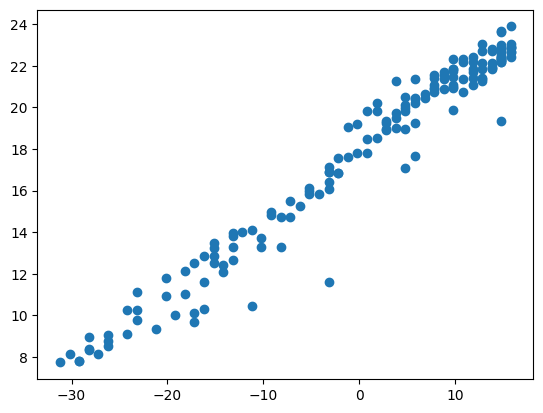

In [ ]:
plt.scatter(X,y)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.SGD(0.001, 0.9),
              loss='mse')

In [ ]:
def schedule(epoch, lr):
  if epoch >= 50:
     return 0.0001
  return 0.001

scheduler = tf.keras.callbacks.LearningRateScheduler(schedule)

In [ ]:
R = model.fit(X,y, epochs=200, callbacks=[scheduler])

Epoch 1/200
6/6 [==============================] - 0s 4ms/step - loss: 618.4494 - lr: 0.0010
Epoch 2/200
6/6 [==============================] - 0s 3ms/step - loss: 1764.5897 - lr: 0.0010
Epoch 3/200
6/6 [==============================] - 0s 2ms/step - loss: 1319.6482 - lr: 0.0010
Epoch 4/200
6/6 [==============================] - 0s 2ms/step - loss: 686.2202 - lr: 0.0010
Epoch 5/200
6/6 [==============================] - 0s 2ms/step - loss: 369.4271 - lr: 0.0010
Epoch 6/200
6/6 [==============================] - 0s 3ms/step - loss: 300.8970 - lr: 0.0010
Epoch 7/200
6/6 [==============================] - 0s 2ms/step - loss: 241.1958 - lr: 0.0010
Epoch 8/200
6/6 [==============================] - 0s 2ms/step - loss: 198.3194 - lr: 0.0010
Epoch 9/200
6/6 [==============================] - 0s 3ms/step - loss: 97.3023 - lr: 0.0010
Epoch 10/200
6/6 [==============================] - 0s 3ms/step - loss: 41.6191 - lr: 0.0010
Epoch 11/200
6/6 [==============================] - 0s 2ms/step - los

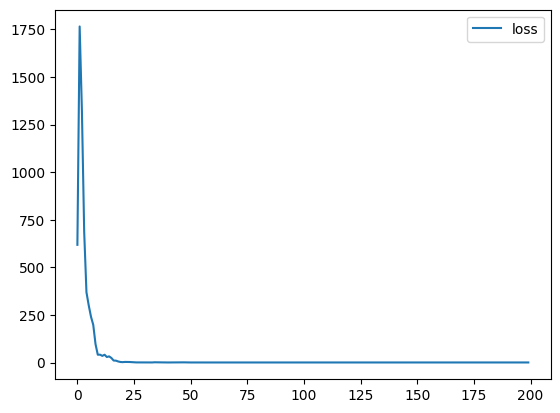

In [ ]:
#print loss
plt.plot(R.history['loss'], label='loss')
plt.legend()

In [ ]:
model.layers

In [ ]:
a = model.layers[0].get_weights()[0][0,0]

In [ ]:
a

0.31476685

In [ ]:
print('Time to double', np.log(2)/a)

Time to double 2.202097112978546


In [ ]:
model.save('logisticregression.keras')

In [ ]:
#check file in file system
!ls -lh

total 44K
-rw-r--r-- 1 root root  18K Oct  6 08:52 logisticregression.h5
-rw-r--r-- 1 root root  14K Oct  6 08:53 logisticregression.keras
-rw-r--r-- 1 root root 2.3K Oct  6 08:52 moore.csv
drwxr-xr-x 1 root root 4.0K Oct  4 13:23 sample_data


In [ ]:
model_loaded = tf.keras.models.load_model('logisticregression.keras')
print(model_loaded.layers)